# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import re
import matplotlib.pyplot as plt

%matplotlib inline

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
image_predictions_response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
file_name = 'image_predictions.tsv'
with open(file_name, 'wb') as image_predictions_file:
    image_predictions_file.write(image_predictions_response.content)
image_predictions_df = pd.read_csv(file_name, sep='\t')
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
def twitter_data_from_api():
    """Copied From Project Instruction. I don't have Twitter! """
    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = twitter_archive_df.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

Assuming the above function read the tweets from Twitter's API and stored them in a file named `tweet_json.txt`, let's read this file and create our DataFrame. Let's start with reading and storing the three important fields (plus one validation field): `id`, `id_str`, `retweet_count`, and `favorite_count`. `id_str` is the string version of the `id`. We will use this to see if some tweet id's will have leading zeros, or if they differ from their string version later in the assessing part. 

In [5]:
tweet_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_line = json.loads(line)
        tweet = {}
        tweet['id'] = tweet_line['id']
        tweet['id_str'] = tweet_line['id_str']
        tweet['retweet_count'] = tweet_line['retweet_count']
        tweet['favorite_count'] = tweet_line['favorite_count']
        tweet_list.append(tweet)
tweet_df = pd.DataFrame(tweet_list)
tweet_df.head(5)

,favorite_count,id,id_str,retweet_count
0,39467,892420643555336193,892420643555336193,8853
1,33819,892177421306343426,892177421306343426,6514
2,25461,891815181378084864,891815181378084864,4328
3,42908,891689557279858688,891689557279858688,8964
4,41048,891327558926688256,891327558926688256,9774


## Assessing Data



### Quality Assessment

Let's see the completeness of the data at hand. Let's investigate the count of data for every field in all DataFrames. Together, let's investigate if there are duplicates in the DataFrame and tweet id, which is acting as a primary key (needs to be unique in the data). 

In [6]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive_df.duplicated().any()

False

In [8]:
twitter_archive_df.tweet_id.duplicated().any()

False

In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
id_str            2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [10]:
tweet_df.duplicated().any()

False

In [11]:
tweet_df.id.duplicated().any()

False

In [12]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions_df.duplicated().any()

False

In [14]:
image_predictions_df.tweet_id.duplicated().any()

False

Ok, from the above set of executions, we can see that nothing was duplicated in all DataFrames. This is great! 

We can also see that the `twitter_archive_df` contains 2356 entries, while the `tweet_df` contains 2354 rows and the `image_predictions_df` contains 2075 rows. This shows that some entries aren't available from `tweet_df` for tweet_ids in `twitter_archive_df`. We can remove those tweets from the archive which don't have data from the API. We will note this for cleaning later.

The predictions, well, some of the tweets might have predictions and some might not. We will keep both of them and we won't drop those tweets without predictions. We want the data to work, not preparing it for analysis (we are doing data wrangling, not EDA). 

Moving on from checking completeness, let's start with the `twitter_archive_df` DataFrame to see other uncleaness. Let's see the first two rows and the datatypes of the columns. 

In [15]:
pd.set_option('display.max_colwidth', -1) # To see every content of the columns. 
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [16]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

From the above, we can see that some columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id`) are represented as floating point numbers, causing them to be visible with exponents (`e+17`). The `tweet_id` is also represented as an integer, which should have been in `string` format. Having string makes it easier and is recommended by the [Twitter documentation](https://developer.twitter.com/en/docs/twitter-ids#:~:text=Today%2C%20Twitter%20IDs%20are%20unique,number%2C%20and%20a%20sequence%20number) as well. Let's note this in our notes for cleaning later. 

Also, the timestamp fields (`timestamp` and `retweeted_status_timestamp`), as shown below contains datetime data and need to be represented in `datetime` than `string` datatype. Let's add this to our notes for later cleaning.

In [17]:
twitter_archive_df[twitter_archive_df['retweeted_status_timestamp'].notna()].sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,"https://twitter.com/dog_rates/status/788765914992902144/photo/1,https://twitter.com/dog_rates/status/788765914992902144/photo/1",12,10,Butter,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8,10,Eve,None,None,pupper,None


Now let's focus on the data. Let's investigate those tweets with `rating_denominator` and `rating_numerator`. It can be seen that all tweets in the archive DataFrame contain those two values (because the `.info` method returned 2356 for the two fields, which is the total number of rows in the DataFrame). 

Then let's see if will have data from the archive which has either rating_denominator different from 10 or rating_numerator less than 10.

In [18]:
twitter_archive_df[(twitter_archive_df['rating_denominator'] != 10) | (twitter_archive_df['rating_numerator'] < 10)].shape

(457, 17)

Hmmm, 457 rows in the archive DataFrame have either `rating_denominator` different from 10 or `rating_numerator` less than 10.

I did see the sampled data to visually detect tweet_id `810984652412424192` in the archive contains a rating of 24/7. But this is because it was not a rating tweet but rather a call for help (via gofundme site). We need to remove this as it's not related to rating at all. Let's next check if we have that in the image predictions DataFrame.

In [19]:
image_predictions_df[image_predictions_df.tweet_id == 810984652412424192]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


It shows that the prediction was good, but since we won't have the tweet_id in the archive data after cleaning, we need to also clean the related data from the image predictions and twitter API data. 

Next, let's see the head of that data to see if those were parsed from the text in correct manner. 

In [20]:
twitter_archive_df[(twitter_archive_df['rating_denominator'] != 10) | (twitter_archive_df['rating_numerator'] < 10)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].head(10)

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
485,814578408554463233,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


Oh, the first row shows a rating of `13.5/10` in the `text` while `5/10` in the `rating_numerator/rating_denominator`. Must have made the mistake of only taking the integer before the slash (/) when parsing. Let's see if this is the case for others with decimal number ratings. 

In [21]:
r = re.compile(r'\d+\.\d+\/\d+') # Regular expression to see only decimal point numbers. 
regmatch = np.vectorize(lambda x: bool(r.search(x))) # For efficiency, let's vectorize.
twitter_archive_df[regmatch(twitter_archive_df['text'].values)][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


Ok, so the above code proves that the 6 entries with decimal number numerators have their rating taken after the decimal point (after the dot). This is noted and will be fixed later.  

Next, from most of the tweets we saw until now, it's becoming clear that the rating_denominator is usually (not always) 10 and rating is usually given at the end of the tweet. Assuming that the rating denominator is out of 10 for single dog rating, let's see if taking the last fraction value makes sense.

In [22]:
r = re.compile(r"(\d+\.?d*)\/\d+")
regmatch = np.vectorize(lambda x: int(r.findall(x)[-1])) # For efficiency, let's vectorize.
wrong_rating = twitter_archive_df[twitter_archive_df['rating_denominator'] != 10]
wrong_rating[regmatch(wrong_rating['text'].values) != wrong_rating.rating_numerator.values][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


Oh, it does. All of the rating values taken were the first fraction from the tweet. But this is wrong. Let's take a note and we will fix this.

Now, let's check if the dog stages are properly set. We are assuming that all stages are mutually execulsive. Going over the first 400 rows of the archive data visually, I noticed that there are some rows with both doggo and floofer set. For example, there is a tweet that has both doggo and floofer set (shown below). But the tweet is explaining that the dog belongs to floofer than doggo. We will fix this in the cleaning stage. 

In [23]:
twitter_archive_df[(twitter_archive_df.doggo != "None") & (twitter_archive_df.floofer != "None")][['text', 'doggo', 'floofer', 'pupper', 'puppo']].head(5)

,text,doggo,floofer,pupper,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None


Programmatically, it can be shown that some rows in the archive DataFrame contained more than one stage. 

In [24]:
def count_stages_per_row (x):
    count = 0
    if x['doggo'] != 'None':
        count += 1
    if x['floofer'] != 'None':
        count += 1
    if x['pupper'] != 'None':
        count += 1
    if x['puppo'] != 'None':
        count += 1
    return count > 1
twitter_archive_df[twitter_archive_df.apply(count_stages_per_row, 1)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

We need to clean this, as some of them are images and predictions of dogs together (instead of a single dog) and some are erroneously set (for example, the first two rows above are like that). Others, like the last row show a rating for two dogs ('father' and 'son').

Now let's try to analyze if there are retweets or replies to conversations. These can be removed since they are not needed (from the problem description). The `.info` on the archive DataFrame shows that there are two fields, `in_reply_to_status_id` and `in_reply_to_user_id`. In the official [Twitter API documentation](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet), it states that these fields are populated if the represented tweet is a reply. Hence, we need to remove these rows. 

To be sure, let's check if there are cases where one is not Null while the other is. If so, we will clean them as well. 

In [25]:
twitter_archive_df[(twitter_archive_df['in_reply_to_status_id'].isna()) & (twitter_archive_df['in_reply_to_user_id'].notna())]['tweet_id'].any() or twitter_archive_df[(twitter_archive_df['in_reply_to_status_id'].notna()) & (twitter_archive_df['in_reply_to_user_id'].isna())]['tweet_id'].any()

False

Ok, that means both fields are either set together or not. There aren't cases where one is set while the other is Null.

In the same note, a retweet is one where the `retweet_*` fields are populated. We can remove those with this field as well. It can be shown that all the three `retweet_*` fields (`retweeted_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id`) are populated together (there isn't one row where one is populated while others are `Null`).

In [26]:
(twitter_archive_df[twitter_archive_df['retweeted_status_id'].notna()].index == twitter_archive_df[twitter_archive_df['retweeted_status_timestamp'].notna()].index).all()

True

If the above is true, that means both fields are set together. If both fields are set together, we can do another equality operator with the remaining column to check if all are either set together or not. This is analogus to the math rule `if A = B and B = C, then A = C`. 

In [27]:
(twitter_archive_df[twitter_archive_df['retweeted_status_id'].notna()].index == twitter_archive_df[twitter_archive_df['retweeted_status_user_id'].notna()].index).all()

True

We take a note to clean the retweets later. 

Let's move on to the Tweet data we gathered from the API. Let's take a peek at it.

In [28]:
tweet_df.sample(5)

,favorite_count,id,id_str,retweet_count
1583,9433,686947101016735744,686947101016735744,3582
17,26080,888804989199671297,888804989199671297,4559
145,0,863471782782697472,863471782782697472,2687
2198,562,668655139528511488,668655139528511488,233
165,20021,859924526012018688,859924526012018688,4349


In [29]:
(tweet_df.retweet_count < 0).any() or (tweet_df.favorite_count < 0).any()

False

In [30]:
(tweet_df.id.astype('str') != tweet_df.id_str).any()

False

The above checks guarantee that the tweet_df data is clean. No cleaning steps are required. 

Let's move on to the predicted images data. Let's take a peek at it.

In [31]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
547,677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.313464,True,boxer,0.218503,True,French_bulldog,0.106462,True
1193,740214038584557568,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False


From the top where we displayed the output of the .info, we have seen that the tweet_id is represented as an int. But this will sometimes truncate and represent the data as a floating point number with exponents. To avoid this risk in our presentation, let's represent it as a string. Let's note this. 

Also, I noticed that the dog types (p1, p2, p3) have underscore (_) as a separater. We can replace this with space to make it more readable. Also, the words aren't all starting with capital letters, hence, to be consistent, we will make every word start capitalized.

What about the confidence levels? Since these are values to tell how confident the machine learning model is about the prediction, it's values should be between 0 and 1 (both inclusive). Let's check if this is conserved. 

In [32]:
def prediction_has_valid_probability (col):
    return (image_predictions_df[col] >= 0).all() and (image_predictions_df[col] <= 1).all()
prediction_has_valid_probability("p1_conf") and prediction_has_valid_probability("p2_conf") and prediction_has_valid_probability("p3_conf")

True

Ok, the above code checks if the values in `p1_conf`, `p2_conf` and `p3_conf` are between 0 and 1. They are! 

Moving on to the `img_num` field, this holds the images in the tweet in which the prediction was made. The given here is the maximum number of images in the tweets are 4. Which means, this table shouldn't have more than 4 images per tweet. Let's check the data in this field. 

First, let's get the value counts in our data. This tells how many tweets possibly have more than one image. 

In [33]:
image_predictions_df['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

The above also confirms that the maximum number of images per were indeed 4. 

Then, let's check if there are any possible duplicates for a tweet, image and prediction. 

In [34]:
image_predictions_df[['tweet_id', 'img_num']].duplicated().any()

False

There are 0 duplicates in the data, great! 

### Tidyness Assessment

Let's see the columns for the archive data. 

In [35]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

And the glance of the content, maybe the first three lines. Let's use `.head()` to do that. 

In [36]:
twitter_archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


Hmmm, columns `doggo`, `floofer`, `pupper` and `puppo` seems to describe the stage. These can be done in a single column. Let's note that in `Tidiness Issues` section.

Let's see what the JSON data holds. 

In [37]:
tweet_df.head(3)

,favorite_count,id,id_str,retweet_count
0,39467,892420643555336193,892420643555336193,8853
1,33819,892177421306343426,892177421306343426,6514
2,25461,891815181378084864,891815181378084864,4328


This data is an extension of the archive data. This means, the two can be represented in a single DataFrame/table. Let's jot that in the `Tidiness Issues` and we will fix it later. 

Let's see what the image predictions data looks like. 

In [38]:
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Looks like there are 3 predictions (p1, p2, and p3) for every image. These predictions hold the dog breed type, confidence level, and if the image is of a dog or not. We can take the highest confidence level and its predictions than taking 3 predictions. Also, this data is the same observational unit with the archive data and can be merged with it. Let's take a note of this in the `Tidiness Issues` and we will clean it later. 

### Quality issues
1. `twitter_archive_df` has 2356 entries, while the `tweet_df` contains 2354 rows.
2. `twitter_archive_df` - `timestamp` and `retweeted_status_timestamp` are `string`s not `datetime`s.
3. `twitter_archive_df` - `tweet_id` is an `int` not a `string`. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` are `float` and not `string`. 
4. `twitter_archive_df` - `tweet_id = 848212111729840128` had a reply tweet which revises the rating. The first rating is below 10. 
5. `twitter_archive_df` - `tweet_id = 810984652412424192` is a gofundme call and not a rating. For this, we are removing it. 
740373189193256964	 is a 9/11 surviver and their rating is stated later. 
6. `twitter_archive_df` - clean retweets and replies. 
7. `twitter_archive_df` - there are decimal number ratings in the `text` field, but only numbers after the decimal point are parsed to the `rating_numerator` field. 
8. `twitter_archive_df` - Those with rating_denominator different from 10, reparse the rating and take the last fraction. 
9. `twitter_archive_df` - more than one stages are given in some tweets.
10. `image_prediction_df` - tweet_id needs to be represented as a string.
11. `image_prediction_df` - dog types stored in p1, p2, and p3 need to be space separated than underscore (_). They also need to be consistant on starting every letter with capital letter.

### Tidiness issues
1. Dog stages from the archive data needs to be in one categorical column. The categories are doggo, floofer, pupper, and puppo. 

2. The Archive and JSON data needs to be in one DataFrame (table). 

3. We have to pick the highest confidence level and discard the other predictions for the image predictions data. Then merge the Image predictions data with the archive data since they represent the same observational unit.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
tweet_df_clean = tweet_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

### Issue #1: Missing Data 

#### tweet_df (2354 instead of 2356)

##### Define:

tweet_df, the data we gathered from Twitter's API has 2354 rows than 2356 (the total archive data). Let's check if we can fill the 2 remaining rows. 

##### Code:

Let's first see the two missing data. For this, we can use the data from archive's tweet_ids. 

In [40]:
pd.concat([twitter_archive_df_clean['tweet_id'], tweet_df['id']]).drop_duplicates(keep=False)

19     888202515573088257
815    771004394259247104
dtype: int64

Checking this two values in Twitter using `https://twitter.com/dog_rates/status/<TWEET_ID>`, the two Tweets doesn't exist or are not visible for the general public. Hence we are removing them here. (Not relevant/interesting here but the archive data with tweet_id 888202515573088257 contains data that is tweeted in 887473957103951883. Anyways, we are removing 888202515573088257, so not important to clean it.)

In [41]:
tweet_ids = [888202515573088257, 771004394259247104]
index = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'].isin(tweet_ids)]
twitter_archive_df_clean.drop(index=index.index, inplace=True)

##### Test

We can assert that there aren't any rows in the archive file with `tweet_id` similar to the two tweet_ids we removed. It also needs to be a 2354 by 17 DataFrame.

In [42]:
assert twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'].isin(tweet_ids)].shape[0] == 0
assert twitter_archive_df_clean.shape == (2354, 17)

### Issues #2, #3 and #10:  DataType

#### Timestamp fields should be datetype objects, not string

##### Define

Timestamp fields in the archive data, `timestamp` and `retweeted_status_timestamp` needs to be converted from string to datetime. 

##### Code

In [43]:
columns = ['timestamp', 'retweeted_status_timestamp']
for column in columns:
    twitter_archive_df_clean[column] = pd.to_datetime(twitter_archive_df_clean[column])

##### Test

In [44]:
columns = ['timestamp', 'retweeted_status_timestamp']
for column in columns:
    assert twitter_archive_df_clean[column].dtype == 'datetime64[ns]'

#### IDs should be represented as strings

##### Define

- Convert `tweet_id` from int to string in archive data and image predictions data. 
- Convert `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` from float to string.

##### Code

In [45]:
columns = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for column in columns:
    twitter_archive_df_clean[column] = twitter_archive_df_clean[column].astype('str')
    # Since astype('str') converts NaNs to 'nan' (string format), it will remove the capability 
    # of Pandas to perform notna() and isna() functionalities. To avoid this, replace the 'nan' 
    # back to numpy's nan. https://github.com/pandas-dev/pandas/issues/25353. 
    twitter_archive_df_clean[column].replace('nan', np.nan, inplace=True)
    
image_predictions_df_clean["tweet_id"] = image_predictions_df_clean["tweet_id"].astype('str')

##### Test

Testing this requires checking that the non-null values are represented correctly. We can check if the number of non-nulls is the same as the original/unchanged data

In [46]:
columns = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for column in columns:
    assert twitter_archive_df_clean[column].dtype == 'object'
assert image_predictions_df_clean['tweet_id'].dtype == 'object'

### Issue #4: Updated Rating

#### Update rating for tweet_id = 848212111729840128

##### Define

Going to the tweet (https://twitter.com/dog_rates/status/848212111729840128) and scrolling by visual assessment, I have found the revised tweet (reply for the original tweet) => https://twitter.com/dog_rates/status/848213670039564288. I can find this in the archive and set the value to the original tweet. Since the reply is not needed, it will be cleaned at a later stage. 

##### Code

In [47]:
updated_rating = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == '848213670039564288'].rating_numerator
row_index = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == '848212111729840128'].index
twitter_archive_df_clean.loc[row_index, "rating_numerator"] = int(updated_rating.iloc[0])

##### Test

In [48]:
assert twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == '848212111729840128']['rating_numerator'].iloc[0] == 11

### Issue 5: Remove Rating Unrelated Tweets

#### Remove tweet with id 810984652412424192 

##### Define

Remove tweet with id 810984652412424192 from the archive, twitter api and image predictions DataFrame because it's not a rating tweet.

##### Code

In [49]:
# From Twitter archive data 
index_to_remove = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == "810984652412424192"].index
twitter_archive_df_clean.drop(index=index_to_remove, inplace=True)
# From Twitter API's data
index_to_remove = tweet_df_clean[tweet_df_clean.id == 810984652412424192].index
tweet_df_clean.drop(index=index_to_remove, inplace=True)
# From Image Predictions data
index_to_remove = image_predictions_df_clean[image_predictions_df_clean.tweet_id == 810984652412424192].index
image_predictions_df_clean.drop(index=index_to_remove, inplace=True)

##### Test

In [50]:
assert not (twitter_archive_df_clean.tweet_id == "810984652412424192").any()
assert not (tweet_df_clean.id_str == "810984652412424192").any()
assert not (image_predictions_df_clean.tweet_id == 810984652412424192).any()

### Issue #6: Retweets and Replies

#### Clean Retweets and Replies

##### Define

Remove retweets and replies from the archive dataset.

So, the tweets in the archive data with `in_reply_to_status_id` and `retweeted_status_id` are replies and retweets (it is shown in the analysis that these two fields are sufficient to know about replies and retweets as there won't be cases where the other `retweeted_*` fields are set and Null for `retweeted_status_id` -- and same for `in_reply_*`). We need to remove these rows. The same tweet_ids needs to be removed from the predictions as well as the tweet data (from the Twitter API). 

Once the rows are removed, the columns stating replies and retweets are irrelevant. This is because the archive dataset don't contain retweets and replies and all rows will hold NaN. Hence, we can also drop these columns.

##### Code

In [51]:
tweet_df_clean.query('id == 886258384151887873')

,favorite_count,id,id_str,retweet_count
30,28469,886258384151887873,886258384151887873,6523


In [52]:
twitter_archive_df_clean.query('tweet_id == "886258384151887873"').index

Int64Index([31], dtype='int64')

In [53]:
twitter_archive_df_clean.query('tweet_id == "886258384151887873"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
31,886258384151887873,NaN,NaN,2017-07-15 16:17:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Waffles. His doggles are pupside down. Unsure how to fix. 13/10 someone assist Waffles https://t.co/xZDA9Qsq1O,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886258384151887873/photo/1,13,10,Waffles,None,None,None,None


In [54]:
# Get retweets and replies in one series
replies = twitter_archive_df_clean[twitter_archive_df_clean['in_reply_to_status_id'].notna()].index.to_series()
retweets = twitter_archive_df_clean[twitter_archive_df_clean['retweeted_status_id'].notna()].index.to_series()
retweet_and_reply_indexes = pd.concat([replies, retweets]).drop_duplicates()
retweet_and_reply_tweet_ids = twitter_archive_df_clean.loc[retweet_and_reply_indexes]['tweet_id'].tolist()

In [55]:
# Remove retweets and replies from the archive DataFrame. 
twitter_archive_df_clean.drop(labels=retweet_and_reply_indexes, inplace=True)

In [56]:
# Delete rows from tweet_df_clean DataFrame.
tweet_indexes_to_delete = tweet_df_clean[tweet_df_clean['id_str'].isin(retweet_and_reply_tweet_ids)].index.to_series()
tweet_df_clean.drop(labels=tweet_indexes_to_delete, inplace=True)

In [57]:
# Delete rows from image_predictions_df_clean DataFrame.
image_prediction_indexes_to_delete = image_predictions_df_clean[image_predictions_df_clean['tweet_id'].isin(retweet_and_reply_tweet_ids)].index.to_series()
image_predictions_df_clean.drop(labels=image_prediction_indexes_to_delete, inplace=True)

In [58]:
# Drop the retweet and reply related columns from the archive DataFrame.
columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
twitter_archive_df_clean.drop(columns=columns, inplace=True)

##### Test

In [59]:
# Testing the archive DataFrame.
# Check rows.
assert twitter_archive_df_clean.index.shape == twitter_archive_df_clean.index.difference(retweet_and_reply_indexes.index).shape
assert retweet_and_reply_indexes.index.shape == retweet_and_reply_indexes.index.difference(twitter_archive_df_clean.index).shape
# Check columns.
columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
assert not twitter_archive_df_clean.columns.to_series().isin(columns).any()

In [60]:
# Testing the tweet_df_clean DataFrame.
assert tweet_df_clean[tweet_df_clean.index.to_series().isin(tweet_indexes_to_delete)].shape[0] == 0

In [61]:
# Testing image_predictions_df_clean DataFrame.
assert image_predictions_df_clean[image_predictions_df_clean.index.to_series().isin(image_prediction_indexes_to_delete)].shape[0] == 0

### Issue #7 and #8. Ratings

#### Decimal Point Ratings

##### Define

Ratings with decimal points weren't correctly parsed, hence, we need to reparse everything again. 

To reparse, the idea is to take the last fraction (the one with /). This is because mostly the WeRateDogs account put rating at the end.

Since we are going to have floating numbers as numerator, this will change the `rating_numerator's` datatype to float from int. 

##### Code

In [62]:
r = re.compile(r'\d+\.\d+\/\d+') # Regular expression to see only decimal point numbers. 
regmatch = np.vectorize(lambda x: bool(r.search(x))) # For efficiency, let's vectorize.
indexes = twitter_archive_df_clean[regmatch(twitter_archive_df_clean['text'].values)].index
r_numerator = re.compile(r'(\d+\.\d+)\/\d+')
regmatch = np.vectorize(lambda x: float(r_numerator.findall(x)[0])) # This will also update the datatype to float
twitter_archive_df_clean.loc[indexes, 'rating_numerator'] = regmatch(twitter_archive_df_clean.loc[indexes]['text'].values)

In [63]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null int64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 292.9+ KB


##### Test

In [64]:
assert twitter_archive_df_clean.rating_numerator.dtype == 'float'

twitter_archive_df_clean.loc[indexes][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


#### Different from 10 denominators

##### Define

For those archive data with rating denominator different from 10, reparse both the rating numerator and denominator.

##### Code

In [65]:
r = re.compile(r"(\d+\.?d*)\/\d+") # Any rating, one with decimal point or not.
regmatch = np.vectorize(lambda x: int(r.findall(x)[-1])) # For efficiency, let's vectorize.
diff_from_10_rating = twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10]
indexes = diff_from_10_rating[regmatch(diff_from_10_rating['text'].values) != diff_from_10_rating.rating_numerator.values].index

In [66]:
# Make the changes for both numerator and denominator
r_numerator = re.compile(r"(\d+\.?d*)\/\d+")
r_denominator = re.compile(r"\d+\.?d*\/(\d+)")
new_numerator_func = np.vectorize(lambda x: int(r_numerator.findall(x)[-1]))
new_denominator_func = np.vectorize(lambda x: int(r_denominator.findall(x)[-1]))
original_text = twitter_archive_df_clean.loc[indexes]['text'].values
twitter_archive_df_clean.loc[indexes, 'rating_numerator'] = new_numerator_func(original_text)
twitter_archive_df_clean.loc[indexes, 'rating_denominator'] = new_denominator_func(original_text)

##### Test

In [67]:
twitter_archive_df_clean.loc[indexes][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10


### Issue 9: More than 1 dog stages

#### More than one dog stage

##### Define

Some rows have more than one dog stages assigned. From the book, one can see that a dog can have only one stage at a time. So, at the time of rating, a dog can have only one rating.

##### Code

In [68]:
def count_stages_per_row (x):
    count = 0
    if x['doggo'] != 'None':
        count += 1
    if x['floofer'] != 'None':
        count += 1
    if x['pupper'] != 'None':
        count += 1
    if x['puppo'] != 'None':
        count += 1
    return count > 1
twitter_archive_df_clean[twitter_archive_df_clean.apply(count_stages_per_row, 1)][['tweet_id', 'text', 'doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,text,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,None,pupper,None
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,None,pupper,None
1063,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None


Since this problem involves understanding the text (meaning of tweet), it's out of the scope of this course to solve this in an automated fashion. However, since the row count is small, we can change the data manually. 

twee_id | correct stage | stage to drop |
--- | --- | --- |
855851453814013952 | puppo | doggo
854010172552949760 | floofer | doggo 
817777686764523521 | pupper | doggo
808106460588765185 | pupper and doggo | DROP*
801115127852503040 | pupper | doggo
785639753186217984 | doggo | pupper
781308096455073793 | pupper and doggo | DROP*
759793422261743616 | doggo and pupper | DROP*
751583847268179968 | None | doggo and pupper
741067306818797568 | pupper and doggo | DROP*
733109485275860992 | pupper and doggo | DROP*

Drop* -> Drop because more than one dog is rated and we plan to hypothethically keep it to one rating. This is can change depending on the requirements but to make it easy, let's drop them.

In [69]:
drop_doggo = ["855851453814013952", "854010172552949760", "817777686764523521",
              "801115127852503040", "751583847268179968"]
twitter_archive_df_clean.loc[twitter_archive_df_clean[twitter_archive_df_clean.tweet_id.isin(drop_doggo)].index, "doggo"] = "None"
drop_row = [ "808106460588765185", "781308096455073793", "759793422261743616",
             "741067306818797568", "733109485275860992"]
twitter_archive_df_clean.drop(index=twitter_archive_df_clean[twitter_archive_df_clean.tweet_id.isin(drop_row)].index, inplace=True)
drop_pupper = ["751583847268179968"]
twitter_archive_df_clean.loc[twitter_archive_df_clean[twitter_archive_df_clean.tweet_id.isin(drop_pupper)].index, "pupper"] = "None"

In [70]:
twitter_archive_df_clean[twitter_archive_df_clean.tweet_id.isin(drop_doggo)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10,None,None,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10,None,None,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,10,Dido,None,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10,Bones,None,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10,None,None,None,None,None


##### Test

In [71]:
changed_tweet_ids = ["855851453814013952", "854010172552949760", "817777686764523521",
              "801115127852503040", "751583847268179968"]
twitter_archive_df_clean[twitter_archive_df_clean.tweet_id.isin(changed_tweet_ids)][['tweet_id', 'text', 'doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,text,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,None,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",None,floofer,None,None
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",None,None,pupper,None
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,None,None,pupper,None
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,None,None,None,None


In [72]:
dropped_tweet_ids = [ "808106460588765185", "781308096455073793", "759793422261743616",
             "741067306818797568", "733109485275860992"]
assert not twitter_archive_df_clean.tweet_id.isin(dropped_tweet_ids).any()

### Replace underscore with space for dog breed types in image predictions DataFrame

#### Define

Dog breed types are separated by underscore. We can change this to space (' ') to make it clean. We will also make every word start with capital letters. 

#### Code

In [73]:
columns = ['p1', 'p2', 'p3']
for column in columns:
    image_predictions_df_clean[column] = image_predictions_df_clean[column].str.replace('_', ' ').str.title()

#### Test

In [74]:
image_predictions_df_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### Tidiness

#### Issue #1: Unpivot Dog Stages

##### Define:

Dog stages in the archive data can be stored in one column instead of four. We will also represent those with no stages as empty (`''`) strings than `None`.

##### Code

We couldn't use the Panda's melt function for this because there are some valid rows with None for all dog stages (a tweet that doesn't describe the stage). So, let's write a special function to handle this. 

In [75]:
def dog_stage (row):
    if row['doggo'] != 'None':
        return row['doggo']
    elif row['floofer'] != 'None':
        return row['floofer']
    elif row['pupper'] != 'None':
        return row['pupper']
    elif row['puppo'] != 'None':
        return row['puppo']
    return ''
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean.apply(dog_stage, axis=1)

In [76]:
# Now let's remove the pivoted dog stages
twitter_archive_df_clean.drop(columns=["doggo", 'floofer', 'pupper', 'puppo'], inplace=True)

##### Test

In [77]:
assert (twitter_archive_df_clean.dog_stage.isin(['doggo', 'floofer', 'pupper', 'puppo', ''])).all()

In [78]:
assert (twitter_archive_df_clean.columns.isin(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'])).all()

### Issue #2: Merge Archive and API Data

#### Define

The archive and api data talk about the same data, hence they must be confined in a single table. They can be joined using the tweet id which is common across the two tables. These will allow us to have two more columns in the archive dataset, the favorite_count and retweet_count. 

#### Code

In [79]:
columns = twitter_archive_df_clean.columns.tolist()
columns.extend(['favorite_count', 'retweet_count'])
twitter_archive_df_clean = twitter_archive_df_clean.merge(tweet_df_clean, how='left', left_on='tweet_id', right_on='id_str')[columns]

#### Test

In [80]:
columns = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'favorite_count', 'retweet_count']
assert twitter_archive_df_clean.columns.isin(columns).all()

In [81]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 11 columns):
tweet_id              2091 non-null object
timestamp             2091 non-null datetime64[ns]
source                2091 non-null object
text                  2091 non-null object
expanded_urls         2088 non-null object
rating_numerator      2091 non-null float64
rating_denominator    2091 non-null int64
name                  2091 non-null object
dog_stage             2091 non-null object
favorite_count        2091 non-null int64
retweet_count         2091 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 196.0+ KB


### Issue #3: Only pick the highest confidence level for image predictions and merge with archive data

#### Define

Image prediction columns, p1, p2, and p3; p1_conf, p2_conf, and p3_conf; p1_dog, p2_dog, and p3_dog hold similar data. The one with the highest confidence should be taken as the prediction and the others should be discarded. Also, this data holds the same observational unit as the archive data and should be merged with it.

#### Code

In [82]:
predictions = []
def create_predictions_df (row):
    if row.p1_conf >= row.p2_conf:
        if (row.p1_conf > row.p3_conf):
            confidence = row.p1_conf
            prediction = row.p1
            is_dog = row.p1_dog
        else:
            confidence = row.p3_conf
            prediction = row.p3
            is_dog = row.p3_dog
    elif row.p2_conf >= row.p3_conf:
        confidence = row.p2_conf
        prediction = row.p2
        is_dog = row.p2_dog
    else:
        confidence = row.p3_conf
        prediction = row.p3
        is_dog = row.p3_dog
    p = {
        'tweet_id': row.tweet_id,
        'confidence': confidence,
        'prediction': prediction,
        'is_dog': is_dog
    }
    predictions.append(p)
image_predictions_df_clean.apply(create_predictions_df, axis=1)
predictions_df = pd.DataFrame(predictions)

In [83]:
image_predictions_df_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [84]:
image_predictions_df_clean = image_predictions_df_clean.merge(predictions_df, how='left', on='tweet_id')

Now, we can merge it with the archive data.

In [85]:
twitter_archive_main = twitter_archive_df_clean.merge(image_predictions_df_clean, how='left', on='tweet_id')

#### Test

In [86]:
image_predictions_df_clean.head()

,tweet_id,jpg_url,confidence,is_dog,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,True,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,True,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,True,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,True,Miniature Pinscher


In [87]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973 entries, 0 to 1972
Data columns (total 5 columns):
tweet_id      1973 non-null object
jpg_url       1973 non-null object
confidence    1973 non-null float64
is_dog        1973 non-null bool
prediction    1973 non-null object
dtypes: bool(1), float64(1), object(3)
memory usage: 79.0+ KB


In [88]:
twitter_archive_main.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,confidence,is_dog,prediction
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,0.097049,False,Orange
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0.323581,True,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0.716012,True,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0.170278,False,Paper Towel
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,True,Basset


## Storing Data
Saving the cleaned dataset. 

In [89]:
# We have one dataset we want to store. The merged data between all data sets (archive, api and prediction).
twitter_archive_main.to_csv('twitter_archive_main.csv', index=False)

## Analyzing and Visualizing Data

Let's start with visualizing the rating distribution.

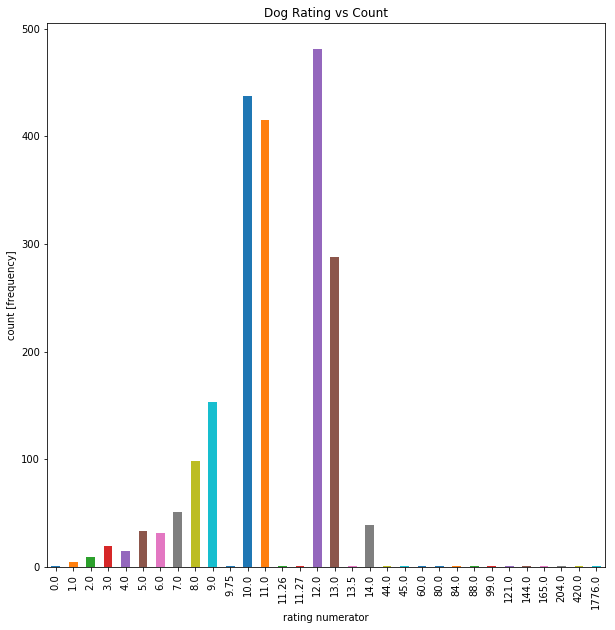

In [90]:
twitter_archive_df_clean.groupby('rating_numerator')['tweet_id'].count().plot(kind='bar', figsize=(10, 10))
plt.xlabel('rating numerator')
plt.ylabel('count [frequency]')
plt.title('Dog Rating vs Count');

The graph above shows that mostly, dogs are given a rating between 9 and 13 (both inclusive). There are rare cases where a rating of 1776 is given -- for a dog wearing the American flag shown below. 

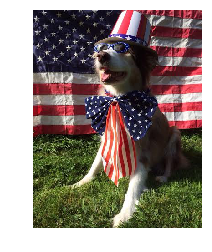

In [91]:
import matplotlib.image as mpimg
from skimage import io

url = image_predictions_df_clean.query('tweet_id == "749981277374128128"')['jpg_url'].iloc[0]
image = io.imread(url)
plt.imshow(image)
plt.axis('off')
plt.show()

We can also see that amongst the four different stages, pupper is the most rated dog stage with 223 dogs rated. Floofer is the one with list number of dogs rated.

In [92]:
# Dog stages vs count
twitter_archive_df_clean.groupby('dog_stage')['tweet_id'].count()

dog_stage
           1761
doggo      73  
floofer    10  
pupper     223 
puppo      24  
Name: tweet_id, dtype: int64

Even though puppers are mostly rated, the ratio between the numerator and denominator about the same for all the dog stages (shown below).

In [93]:
grouped_by_stage = twitter_archive_df_clean.groupby(['dog_stage'])
numerator = grouped_by_stage['rating_numerator'].sum()
denominator = grouped_by_stage['rating_denominator'].sum()

In [94]:
numerator / denominator

dog_stage
           1.173069
doggo      1.182192
floofer    1.180000
pupper     1.075009
puppo      1.204167
dtype: float64

In [95]:
print(f'Amongst the {image_predictions_df_clean.shape[0]} predictions, {image_predictions_df_clean.is_dog.sum()} are dogs')

Amongst the 1973 predictions, 1464 are dogs


Now, let's investigate if tweets with high rating ratio (numerator/denominator) also have high interaction (retweet + favorite count). 

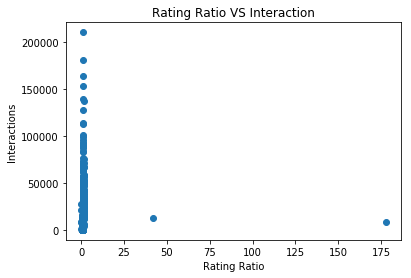

In [96]:
ratings = twitter_archive_df_clean['rating_numerator']/twitter_archive_df_clean['rating_denominator']
interaction_counts = twitter_archive_df_clean['favorite_count'] + twitter_archive_df_clean['retweet_count']

plt.scatter(ratings, interaction_counts)
plt.title('Rating Ratio VS Interaction')
plt.xlabel('Rating Ratio')
plt.ylabel('Interactions');

The above scatter plot shows that most of ratings are concentrated around 0 (less than 10) while there are two outliers to the right (in between 25-50 and above 175). Let's get rid of these outliers to make our case strong and graph visible. This is part of EDA! 

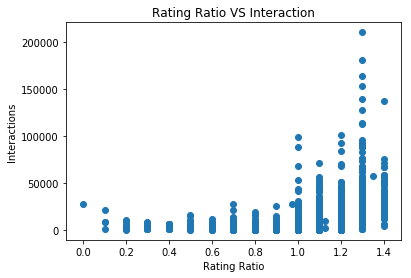

In [97]:
archive_data = twitter_archive_df_clean[(twitter_archive_df_clean.rating_numerator/twitter_archive_df_clean.rating_denominator) < 10]
ratings = archive_data['rating_numerator']/archive_data['rating_denominator']
interaction_counts = archive_data['favorite_count'] + archive_data['retweet_count']

plt.scatter(ratings, interaction_counts)
plt.title('Rating Ratio VS Interaction')
plt.xlabel('Rating Ratio')
plt.ylabel('Interactions');

Indeed, the better the rating ratio, the more the people interact with the tweet! 

### Insights Conclusion:
1. Ratings are concentrated below 15. There is one rating with numerator of 1776. 

2. The rating ratio (numerator/denominator) is nearly the same for all four types.

3. Amongst the 5919 image predictions, 4377 are dogs.

4. Tweets with high rating ratio have more interaction from Twitter users.